## Exploring the data for Bechdel Predictions
* What does the Bechdel test data look like?
    * How many movies are included? -> 8076
    * How many movies received each Bechdel test result
    * How many and what percent of movies pass all parts of the Bechdel test -> 4651, 57.6%
    * How many and what percent of movies fall all parts of the Bechdel test -> 3425, 42.4%
    

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import requests
import csv
import io
import json
from pandas.io.json import json_normalize

%matplotlib inline
import seaborn as sns

In [2]:
inpath = r'C:\Users\dietz\OneDrive\Documents\GitHub\bechdel'

In [3]:
bechdel = pd.read_csv(inpath + r'\bechdel.csv')

In [4]:
len(bechdel)

8076

In [41]:
bechdel.describe()

,Unnamed: 0,id,imdbid,rating,year,bechdel_pass,bechdelPass
count,8076.00000,8076.000000,8.076000e+03,8076.000000,8076.000000,8076.000000,8076.000000
mean,4037.50000,4279.743314,1.104536e+06,2.152055,1995.657875,0.575904,0.575904
std,2331.48472,2485.178574,1.450177e+06,1.086094,23.595979,0.494236,0.494236
min,0.00000,1.000000,3.000000e+00,0.000000,1888.000000,0.000000,0.000000
25%,2018.75000,2110.750000,9.813650e+04,1.000000,1988.000000,0.000000,0.000000
50%,4037.50000,4279.500000,3.970830e+05,3.000000,2005.000000,1.000000,1.000000
75%,6056.25000,6415.250000,1.641464e+06,3.000000,2012.000000,1.000000,1.000000
max,8075.00000,8679.000000,9.358120e+06,3.000000,2019.000000,1.000000,1.000000


Text(0.5,0,'Rating')

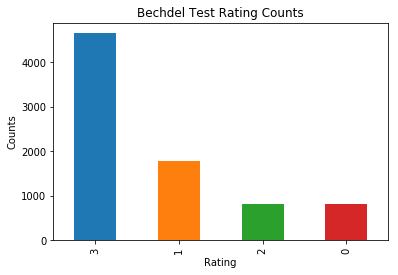

In [10]:
ratingCounts = bechdel.rating.value_counts() ## Wondering if the training data is biased toward movies that pass

ratingCounts.plot(kind='bar', title="Bechdel Test Rating Counts")
sns.mpl.pyplot.ylabel("Counts")
sns.mpl.pyplot.xlabel("Rating")

#### Creating a feature that treats failing one test as overall failure
I want to create a binary Rating variable where a 0, 1, or 2 is considered a failure

In [40]:
bechdel['bechdelPass'] = 0
bechdel.loc[bechdel['rating'] == 3, 'bechdelPass'] = 1

print(bechdel.bechdelPass.value_counts())
round(bechdel.bechdelPass.mean()*100,1)

1    4651
0    3425
Name: bechdelPass, dtype: int64


57.6

In [9]:
bechdel.year.value_counts()

2013    403
2014    379
2011    359
2012    345
2010    343
2009    338
2015    316
2016    296
2008    259
2007    251
2006    247
2017    232
2005    207
2004    193
2002    171
2001    166
2018    151
2003    151
2000    144
1998    133
1999    126
1996    118
1997    108
1995    107
1994    100
1993     96
1991     76
1985     75
1992     75
1990     71
       ... 
1929      9
1922      9
1906      7
1926      6
1916      5
1923      5
1903      5
1917      5
1918      4
1896      4
1921      4
1904      4
1902      4
1898      3
1912      3
1920      3
1909      3
1901      3
1910      3
1895      2
1905      2
1919      2
1913      2
1907      2
1899      2
1914      1
1908      1
1915      1
1892      1
1888      1
Name: year, Length: 125, dtype: int64